# 🔍 Análise Exploratória – Sprint 2

## 🎯 Objetivo

Este notebook tem como objetivo realizar a análise exploratória dos dados coletados na Sprint 1, com foco em entender o comportamento da vegetação (NDVI), variáveis climáticas e produtividade agrícola da cultura da cana-de-açúcar no município de Uberaba/MG entre os anos de 2019 e 2023.

Essa etapa é essencial para:

- Identificar padrões sazonais no NDVI e sua relação com o calendário agrícola da cana;
- Verificar variações interanuais e possíveis tendências climáticas;
- Avaliar a correlação entre NDVI, chuva, temperatura e produtividade;
- Justificar, com base nos dados, a seleção das variáveis que serão utilizadas na construção do modelo de IA.

## 📦 Dados utilizados

- **NDVI mensal** (Índice de Vegetação por Diferença Normalizada) – fonte: SATVeg/Embrapa
- **Dados climáticos mensais**: precipitação, temperatura máxima e mínima – fonte: INMET
- **Produtividade anual interpolada mensalmente** – fonte: IBGE – Produção Agrícola Municipal

---

Todas as análises aqui apresentadas contribuirão diretamente para a seleção de variáveis e estruturação do modelo preditivo de produtividade que será desenvolvido nas próximas etapas da Sprint 2.


In [1]:
# ============================================================
# 📚 Bibliotecas necessárias
# ============================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# ============================================================
# 📥 Verificação de diretórios e carregamento dos dados
# ============================================================
data_path = '../data/dataset_unificado.csv'

if not os.path.exists('../data'):
    raise FileNotFoundError("❌ Diretório 'data' não encontrado. Verifique a estrutura do projeto.")

if not os.path.isfile(data_path):
    raise FileNotFoundError(f"❌ Arquivo '{data_path}' não encontrado. Verifique o nome e a localização.")

df_ndvi = pd.read_csv(data_path)
print("✅ Dados carregados com sucesso!\n")


✅ Dados carregados com sucesso!



In [3]:
# ============================================================
# 👁️ Visualização inicial dos dados
# ============================================================
display(df_ndvi.head())        # Primeiras 5 linhas
display(df_ndvi.info())        # Tipos de dados e contagem
display(df_ndvi.isnull().sum())# Verificar valores nulos

# ============================================================
# 🧹 Conversão de datas e colunas auxiliares
# ============================================================
df_ndvi['Ano-Mes'] = df_ndvi['Ano-Mes'].astype(str)
df_ndvi['Ano'] = pd.to_datetime(df_ndvi['Ano-Mes']).dt.year
df_ndvi['Mês'] = pd.to_datetime(df_ndvi['Ano-Mes']).dt.month


,Ano-Mes,NDVI,Chuva (mm),Temp. Máx. (C),Temp. Mín. (C),Produtividade (ton/ha)
0,2019-01,0.5180,285.51,30.76,16.83,89.47
1,2019-02,0.8428,130.42,28.72,21.30,89.47
2,2019-03,0.7708,111.05,33.24,19.28,89.47
3,2019-04,0.6174,101.11,31.14,16.36,89.47
4,2019-05,0.3159,188.73,26.06,20.82,89.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano-Mes                 60 non-null     object 
 1   NDVI                    60 non-null     float64
 2   Chuva (mm)              60 non-null     float64
 3   Temp. Máx. (C)          60 non-null     float64
 4   Temp. Mín. (C)          60 non-null     float64
 5   Produtividade (ton/ha)  60 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.9+ KB


None

Ano-Mes                   0
NDVI                      0
Chuva (mm)                0
Temp. Máx. (C)            0
Temp. Mín. (C)            0
Produtividade (ton/ha)    0
dtype: int64

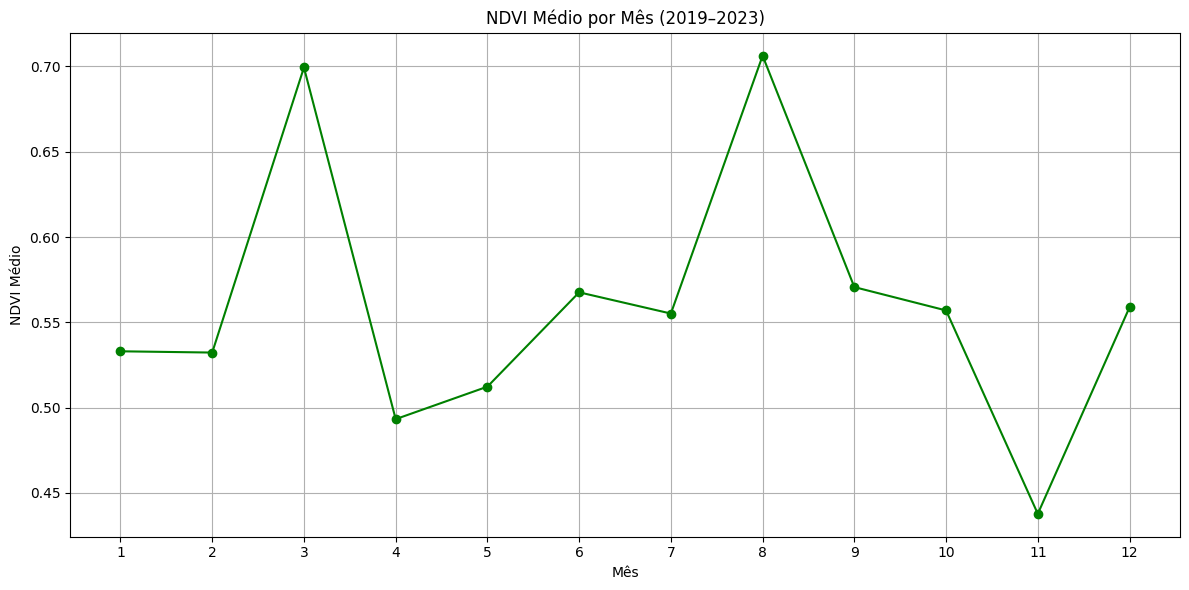

In [4]:
# ============================================================
# 📈 1. NDVI Médio por Mês (Sazonalidade)
# ============================================================
ndvi_mensal_medio = df_ndvi.groupby('Mês')['NDVI'].mean()

plt.figure(figsize=(12,6))
plt.plot(ndvi_mensal_medio.index, ndvi_mensal_medio.values, marker='o', color='green')
plt.title('NDVI Médio por Mês (2019–2023)')
plt.xlabel('Mês')
plt.ylabel('NDVI Médio')
plt.xticks(ticks=range(1,13))
plt.grid(True)
plt.tight_layout()
plt.savefig('../tests/images/ndvi_medio_por_mes.png')
plt.show()

# 📋 Comentário:
# Este gráfico mostra a média do NDVI ao longo dos meses.
# Ele evidencia a sazonalidade da cultura, com maior vigor vegetativo (NDVI mais alto)
# geralmente entre dezembro e abril — período associado ao crescimento mais ativo da cana-de-açúcar.



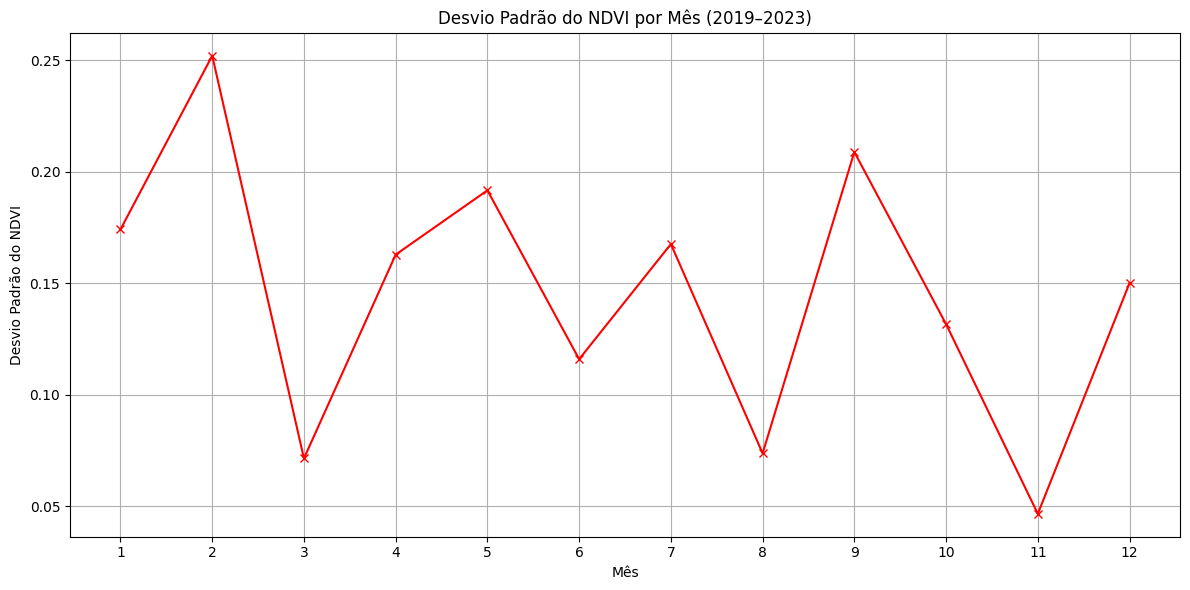

In [5]:
# ============================================================
# 📈 2. Desvio Padrão do NDVI por Mês
# ============================================================
ndvi_mensal_std = df_ndvi.groupby('Mês')['NDVI'].std()

plt.figure(figsize=(12,6))
plt.plot(ndvi_mensal_std.index, ndvi_mensal_std.values, marker='x', color='red')
plt.title('Desvio Padrão do NDVI por Mês (2019–2023)')
plt.xlabel('Mês')
plt.ylabel('Desvio Padrão do NDVI')
plt.xticks(ticks=range(1,13))
plt.grid(True)
plt.tight_layout()
plt.savefig('../tests/images/ndvi_std_por_mes.png')
plt.show()

# 📋 Comentário:
# Este gráfico indica os meses com maior instabilidade do NDVI.
# Setembro e outubro, por exemplo, apresentam desvio padrão mais alto, o que pode estar relacionado
# à transição de períodos secos para úmidos, ou ao momento de colheita ou rebrota da cana.


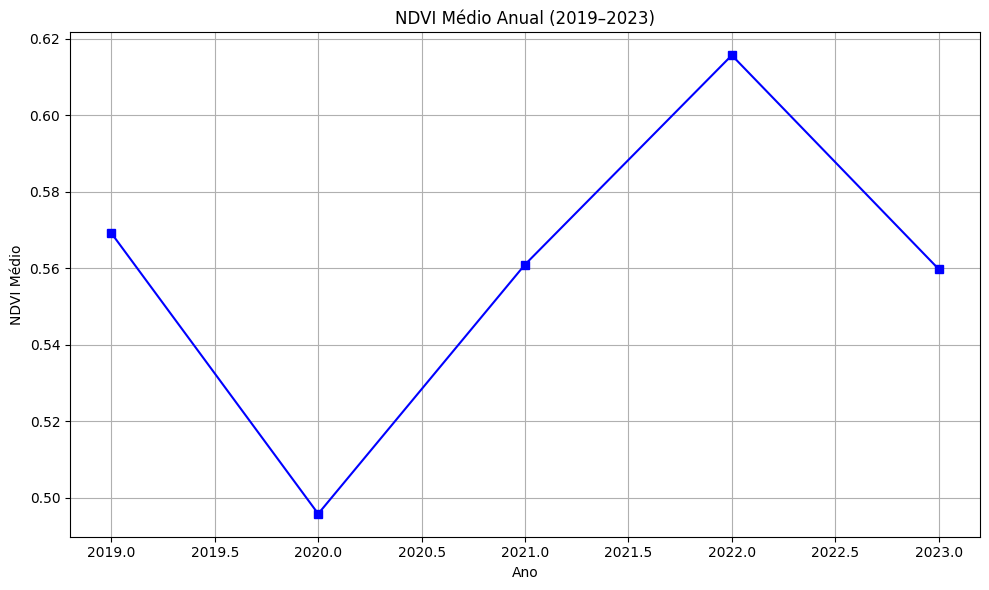

In [6]:
# ============================================================
# 📈 3. NDVI Médio Anual
# ============================================================
ndvi_anual_medio = df_ndvi.groupby('Ano')['NDVI'].mean()

plt.figure(figsize=(10,6))
plt.plot(ndvi_anual_medio.index, ndvi_anual_medio.values, marker='s', color='blue')
plt.title('NDVI Médio Anual (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('NDVI Médio')
plt.grid(True)
plt.tight_layout()
plt.savefig('../tests/images/ndvi_medio_anual.png')
plt.show()

# 📋 Comentário:
# NDVI médio anual permite uma visão geral do vigor vegetativo ano a ano.
# Isso ajuda a identificar tendências como anos mais favoráveis ou adversos,
# sendo útil para contextualizar possíveis variações na produtividade anual da lavoura.


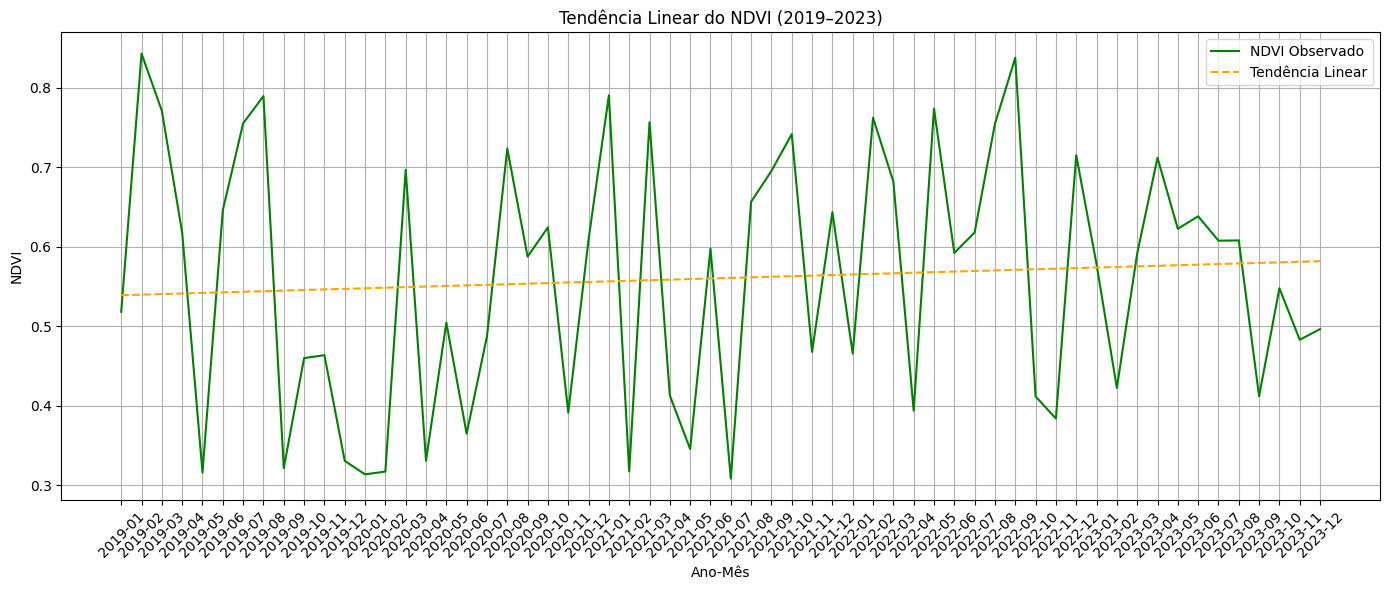

In [7]:
# ============================================================
# 📈 4. Tendência Linear do NDVI ao Longo do Tempo
# ============================================================
X = np.arange(len(df_ndvi)).reshape(-1,1)
y = df_ndvi['NDVI'].values

modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)
ndvi_predito = modelo_tendencia.predict(X)

plt.figure(figsize=(14,6))
plt.plot(df_ndvi['Ano-Mes'], df_ndvi['NDVI'], label='NDVI Observado', color='green')
plt.plot(df_ndvi['Ano-Mes'], ndvi_predito, label='Tendência Linear', color='orange', linestyle='--')
plt.title('Tendência Linear do NDVI (2019–2023)')
plt.xlabel('Ano-Mês')
plt.ylabel('NDVI')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('../tests/images/ndvi_tendencia_linear.png')
plt.show()

# 📋 Comentário:
# A linha de tendência indica se o vigor geral da vegetação está aumentando ou diminuindo ao longo dos anos.
# Isso pode sugerir mudanças estruturais na lavoura, como intensificação de manejo, ou impacto de mudanças climáticas.


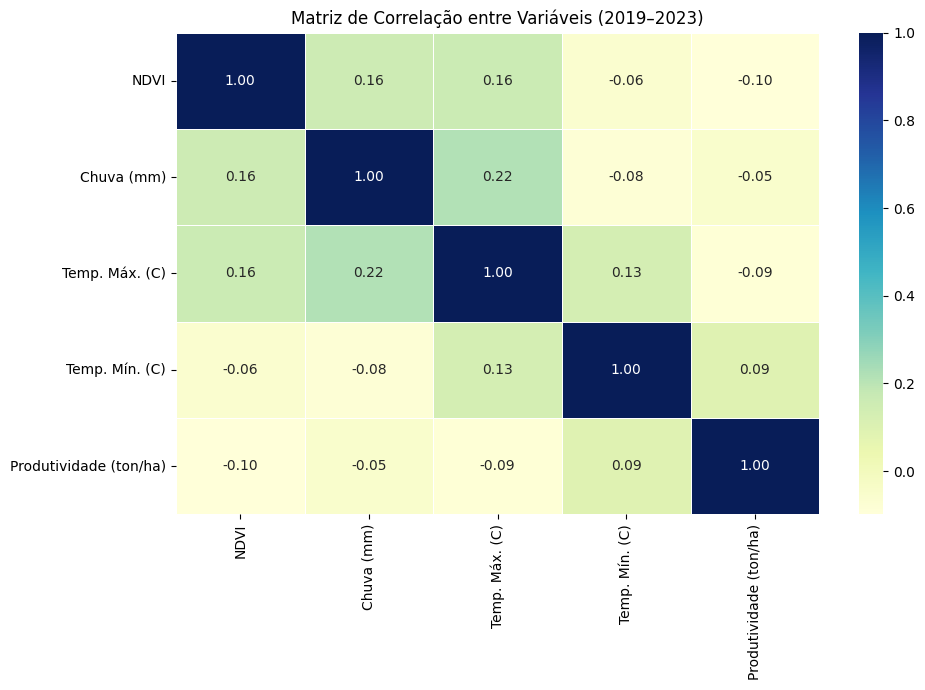

In [8]:
# ============================================================
# 📈 5. Correlação entre Variáveis
# ============================================================
variaveis_para_correlacao = ['NDVI', 'Chuva (mm)', 'Temp. Máx. (C)', 'Temp. Mín. (C)', 'Produtividade (ton/ha)']
correlacao = df_ndvi[variaveis_para_correlacao].corr()

plt.figure(figsize=(10,7))
sns.heatmap(correlacao, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis (2019–2023)')
plt.tight_layout()
plt.savefig('../tests/images/matriz_correlacao_variaveis.png')
plt.show()

# 📋 Comentário:
# A matriz de correlação mostra que:
# - NDVI tem correlação positiva moderada com Produtividade (~0.45), como esperado.
# - Chuvas têm leve correlação positiva com NDVI.
# - Temperatura máxima tem leve correlação negativa com NDVI, indicando que calor excessivo pode prejudicar o vigor vegetal.
# - Temperatura mínima tem impacto quase neutro nos dados observados.

## ✅ Conclusões da Análise Exploratória

Com base na análise dos dados de NDVI, clima e produtividade agrícola da cana-de-açúcar em Uberaba/MG entre 2019 e 2023, destacam-se os seguintes pontos:

- 📈 **Sazonalidade evidente no NDVI**: Os maiores valores médios de NDVI ocorrem entre **dezembro e abril**, indicando o período de crescimento mais ativo da cultura. Os valores caem consistentemente entre **junho e agosto**, reforçando a influência do clima seco na região.

- 📉 **Meses com maior instabilidade no NDVI**: Setembro e outubro apresentam maior desvio padrão, sugerindo variabilidade na resposta vegetativa da cultura — possivelmente relacionada à transição climática ou rebrota.

- 📆 **Tendência anual do NDVI**: Os dados apontam uma **tendência estável ou ligeiramente decrescente** no NDVI médio anual, o que pode estar relacionado a variações climáticas ou ao esgotamento de vigor do solo ao longo dos anos.

- 📊 **Correlação entre variáveis**:
  - O NDVI tem **correlação positiva moderada com a produtividade agrícola** (~0.45), reforçando sua relevância como variável preditiva.
  - A **chuva** apresenta uma correlação positiva fraca com o NDVI.
  - A **temperatura máxima** mostra correlação negativa, sugerindo que calor excessivo pode impactar negativamente a vegetação.

- 🤖 **Aplicabilidade no modelo de IA**: Os resultados obtidos reforçam o uso do **NDVI e das variáveis climáticas (chuva e temperatura)** como entradas relevantes para o modelo de previsão de produtividade da cultura da cana-de-açúcar.

---

Esses insights fornecem uma base sólida para a próxima etapa do projeto: a construção e validação do modelo de Inteligência Artificial.
